<a href="https://colab.research.google.com/github/denmj/Algos-Euler/blob/master/keras_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
from matplotlib import pyplot

from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import LSTM

from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import model_from_json, model_from_yaml, load_model
import numpy as np
import os

In [3]:
def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')

In [50]:
dataset = pd.read_csv('/content/shampoo_sales.csv',  header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [51]:
dataset

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

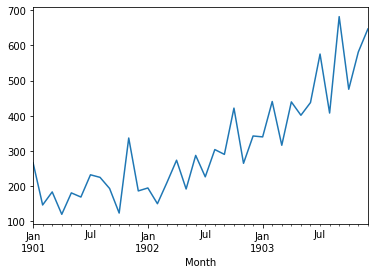

In [6]:
dataset.plot()
pyplot.show()

In [8]:

# split data into train and test
X = dataset.values
train, test = X[0:-12], X[-12:]

In [9]:
hist = [x for x in train]

In [10]:
test

array([339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682. ,
       475.3, 581.3, 646.9])

In [11]:
hist[-1]

342.3

In [13]:
predictions = list() 

In [14]:
for i in range(len(test)):
  predictions.append(hist[-1])
  hist.append(test[i])

In [15]:
predictions

[342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0,
 475.3,
 581.3]

In [16]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 136.761


In [27]:
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [17]:
lag =1 

In [18]:
df = pd.DataFrame(train)

In [19]:
columns = [df.shift(i) for i in range(1, 2)]

In [20]:
columns

[        0
 0     NaN
 1   266.0
 2   145.9
 3   183.1
 4   119.3
 5   180.3
 6   168.5
 7   231.8
 8   224.5
 9   192.8
 10  122.9
 11  336.5
 12  185.9
 13  194.3
 14  149.5
 15  210.1
 16  273.3
 17  191.4
 18  287.0
 19  226.0
 20  303.6
 21  289.9
 22  421.6
 23  264.5]

In [21]:
columns.append(df)

In [22]:
columns

[        0
 0     NaN
 1   266.0
 2   145.9
 3   183.1
 4   119.3
 5   180.3
 6   168.5
 7   231.8
 8   224.5
 9   192.8
 10  122.9
 11  336.5
 12  185.9
 13  194.3
 14  149.5
 15  210.1
 16  273.3
 17  191.4
 18  287.0
 19  226.0
 20  303.6
 21  289.9
 22  421.6
 23  264.5,         0
 0   266.0
 1   145.9
 2   183.1
 3   119.3
 4   180.3
 5   168.5
 6   231.8
 7   224.5
 8   192.8
 9   122.9
 10  336.5
 11  185.9
 12  194.3
 13  149.5
 14  210.1
 15  273.3
 16  191.4
 17  287.0
 18  226.0
 19  303.6
 20  289.9
 21  421.6
 22  264.5
 23  342.3]

In [23]:
df = pd.concat(columns, axis=1)

In [24]:
df

,0,0
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3
5,180.3,168.5
6,168.5,231.8
7,231.8,224.5
8,224.5,192.8
9,192.8,122.9


In [25]:
df.fillna(0, inplace=True)

In [26]:
df

,0,0
0,0.0,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3
5,180.3,168.5
6,168.5,231.8
7,231.8,224.5
8,224.5,192.8
9,192.8,122.9


In [28]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [30]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
#transforming 

X = dataset.values
X = X.reshape(len(X), 1)


In [38]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [39]:
scaler = scaler.fit(X)

In [40]:
scaler_X = scaler.transform(X)

In [42]:
inverted_x = scaler.inverse_transform(scaler_X)

In [44]:
# LSTM Development (RNN - Reccurrent Neural Network)

In [166]:
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [57]:
series = pd.read_csv('/content/shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [60]:
# TRANSFORMATION STEPS 

In [68]:
# GET DIFFERENCE FROM DATA (STATIONARY PART)

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [65]:
raw_values = series.values

In [66]:
diff_values = difference(raw_values, 1)

In [79]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [80]:
supervised = timeseries_to_supervised(diff_values, 1)

In [84]:
supervised_values  =  supervised.values

In [86]:
train, test = supervised_values[0:-12], supervised_values[-12:]

In [88]:
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

In [92]:
scaler, train_scaled, test_scaled = scale(train, test)

In [95]:
# Basic LSTM 


In [106]:
X, y  = train_scaled[:, 0:-1], train_scaled[:, -1]

In [109]:
X = X.reshape(X.shape[0], 1, X.shape[1])

In [121]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, shuffle=False)
		model.reset_states()
	return model

In [ ]:
model = fit_lstm(train_scaled, 1, 1500, 1)

In [127]:
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)

In [130]:
model.predict(train_reshaped, batch_size=1)

array([[-0.18695335],
       [ 0.2391745 ],
       [-0.31425652],
       [ 0.22346553],
       [-0.42989963],
       [ 0.06377352],
       [-0.4810392 ],
       [ 0.05720271],
       [-0.01611367],
       [ 0.1644203 ],
       [-0.8359257 ],
       [ 0.23913144],
       [-0.18782175],
       [ 0.12880525],
       [-0.45691815],
       [-0.47427443],
       [ 0.26774964],
       [-0.50670457],
       [ 0.2644057 ],
       [-0.46933517],
       [ 0.09772631],
       [-0.6949325 ],
       [ 0.22610904]], dtype=float32)

In [138]:
test_scaled

array([[ 0.26733207, -0.16644187],
       [-0.16644187,  0.39088211],
       [ 0.39088211, -0.82411654],
       [-0.82411654,  0.51335312],
       [ 0.51335312, -0.35743189],
       [-0.35743189,  0.04235231],
       [ 0.04235231,  0.59266253],
       [ 0.59266253, -1.05826814],
       [-1.05826814,  1.32802806],
       [ 1.32802806, -1.26760183],
       [-1.26760183,  0.41947667],
       [ 0.41947667,  0.20151066]])

In [135]:
predictions = list() 

In [137]:
for i in range(len(test_scaled)):
  X, y = test_scaled[i, 0:-1], test_scaled[i, -1] 
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [163]:
test_point = test_scaled[1, 0:-1]
test_y = test_scaled[1, -1]

In [155]:
tp = test_point.reshape(1, 1, len(test_point))

In [157]:
test_point, tp

(array([-0.16644187]), array([[[-0.16644187]]]))

In [158]:
pred_point = model.predict(tp, batch_size=1)

In [164]:
pred_point, test_y

(array([[-0.14004363]], dtype=float32), 0.39088211491772307)

In [167]:
y_h = invert_scale(scaler, test_point, pred_point)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [168]:
y_h

2.292912957817325